# Breast Cancer Predicting Model

In this project we want to build a model that will help classify class of breast cancer (malignant or ‘bad’ versus benign or ‘good’). We use Logistic Regression model to achieve our results

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_score,recall_score


#### Loading Data

In [2]:
cancer = pd.read_csv('../data/cancer.data', header = None)
cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### EDA

In [3]:
cancer.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
cancer = cancer.rename(columns={0:'id',1:'clump_thickness',2:'cell_size',3:'cell_shape',
                                  4:'marginal_adhesion',5:'epithelial_cell_size',6:'bare_nuclei',
                                  7:'bland_chromatin',8:'normal_nucleoli',9:'mitoses',10:'diagnosis'})

In [5]:
cancer.replace('?',11,inplace=True)
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    699 non-null    int64 
 1   clump_thickness       699 non-null    int64 
 2   cell_size             699 non-null    int64 
 3   cell_shape            699 non-null    int64 
 4   marginal_adhesion     699 non-null    int64 
 5   epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei           699 non-null    object
 7   bland_chromatin       699 non-null    int64 
 8   normal_nucleoli       699 non-null    int64 
 9   mitoses               699 non-null    int64 
 10  diagnosis             699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
cancer.isna().sum()

id                      0
clump_thickness         0
cell_size               0
cell_shape              0
marginal_adhesion       0
epithelial_cell_size    0
bare_nuclei             0
bland_chromatin         0
normal_nucleoli         0
mitoses                 0
diagnosis               0
dtype: int64

In [7]:
cancer.nunique()

id                      645
clump_thickness          10
cell_size                10
cell_shape               10
marginal_adhesion        10
epithelial_cell_size     10
bare_nuclei              11
bland_chromatin          10
normal_nucleoli          10
mitoses                   9
diagnosis                 2
dtype: int64

In [8]:
cancer.drop(['id'],1,inplace=True)

In [9]:
print("Cancer data set dimensions : {}".format(cancer.shape))

Cancer data set dimensions : (699, 10)


#### Readings on the Diagnosis Numbers

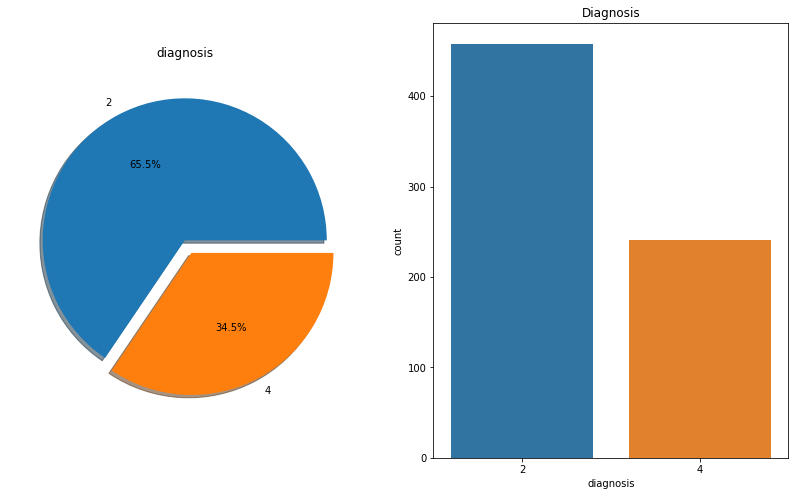

In [10]:
f,ax=plt.subplots(1,2,figsize=(14,8))
cancer['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=cancer,ax=ax[1])
ax[1].set_title('Diagnosis')
plt.show()

In [11]:
print("The number of people with Benign : {}".format(len(cancer[cancer.diagnosis == 2])))
print("The number of people with Malignant  : {}".format(len(cancer[cancer.diagnosis == 4])))

The number of people with Benign : 458
The number of people with Malignant  : 241


#### Correlation Matrix

In [12]:
correlation = cancer.corr()
correlation


,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,diagnosis
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
diagnosis,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


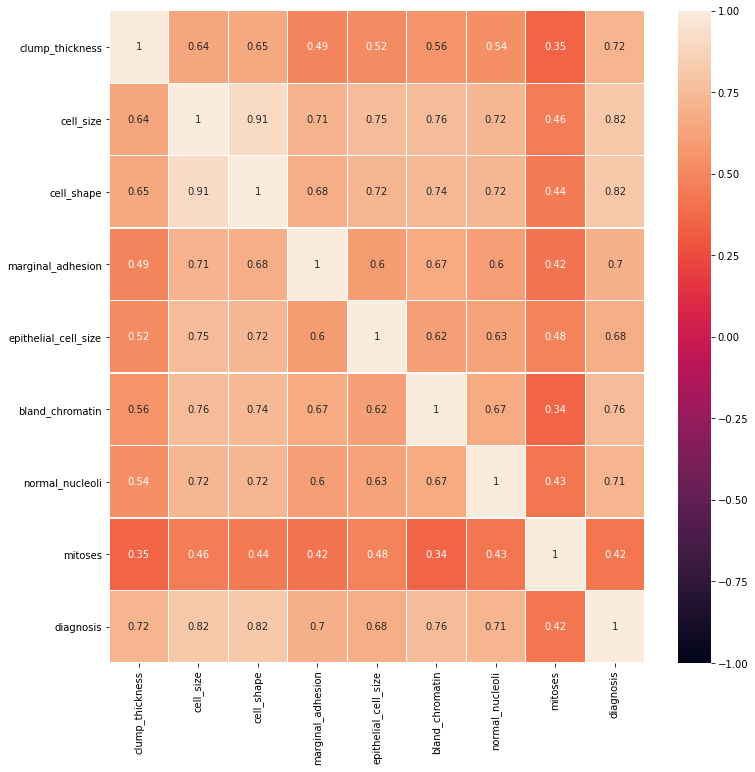

In [13]:
# correlation heatmap

plt.figure(figsize=(12,12))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, linewidth=0.1)

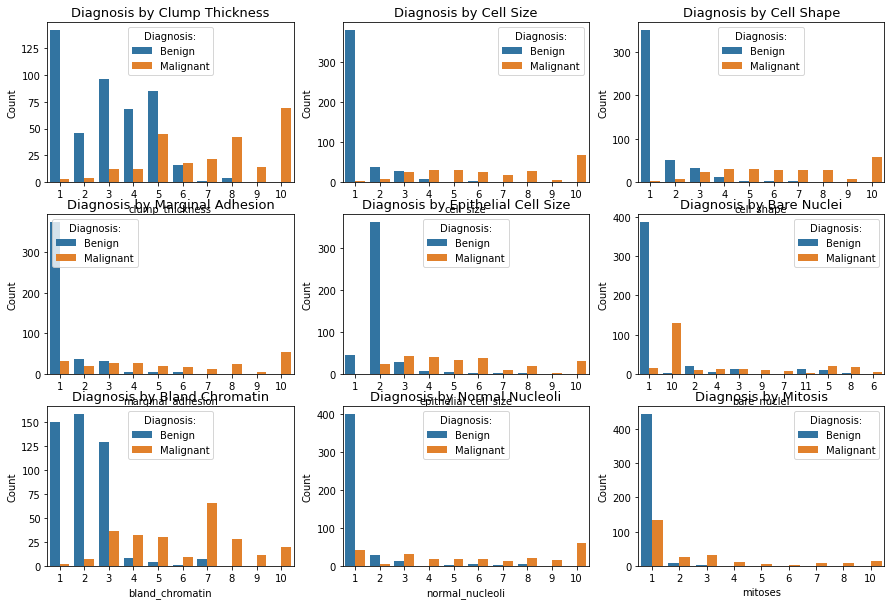

In [14]:
# Use to set hue
by = 'diagnosis'

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.countplot(x='clump_thickness', hue=by, ax=axes[0, 0], data=cancer)
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Diagnosis by Clump Thickness', fontsize=13)
axes[0, 0].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='cell_size', hue=by, ax=axes[0, 1], data=cancer)
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Diagnosis by Cell Size', fontsize=13)
axes[0, 1].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='cell_shape', hue=by, ax=axes[0, 2], data=cancer)
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Diagnosis by Cell Shape', fontsize=13)
axes[0, 2].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='marginal_adhesion', hue=by, ax=axes[1, 0], data=cancer)
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Diagnosis by Marginal Adhesion', fontsize=13)
axes[1, 0].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='epithelial_cell_size', hue=by, ax=axes[1, 1], data=cancer)
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Diagnosis by Epithelial Cell Size', fontsize=13)
axes[1, 1].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='bare_nuclei', hue=by, ax=axes[1, 2], data=cancer)
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Diagnosis by Bare Nuclei', fontsize=13)
axes[1, 2].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='bland_chromatin', hue=by, ax=axes[2, 0], data=cancer)
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Diagnosis by Bland Chromatin', fontsize=13)
axes[2, 0].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='normal_nucleoli', hue=by, ax=axes[2, 1], data=cancer)
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Diagnosis by Normal Nucleoli', fontsize=13)
axes[2, 1].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='mitoses', hue=by, ax=axes[2, 2], data=cancer)
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_title('Diagnosis by Mitosis', fontsize=13)
axes[2, 2].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])


# Modelling

#### Indexing Predictors

In [15]:
high_corr = cancer[['clump_thickness','cell_size','cell_shape','marginal_adhesion','bland_chromatin','normal_nucleoli','diagnosis']]

#### Dummying 

In [16]:
# new_data = pd.get_dummies(high_corr)
# new_data.head(0)

#### Splitting the Data

In [17]:
X=np.array(high_corr.drop(['diagnosis'],1))
y=np.array(high_corr['diagnosis'])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

#### Training and Prediciting

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [21]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = logreg.predict(X_test)

In [23]:
logreg.score(X_test,y_test)


0.9771428571428571

#### Accuracy

In [24]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) 
print('The Score is %6.4f. ' % accuracy_score(y_test, y_pred))

The Score is 0.9771. 


#### Precision

In [25]:
print("Precision score: {}".format(precision_score(y_test,y_pred)))


ValueError: pos_label=1 is not a valid label: array([2, 4])

#### Recall

In [ ]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))

#### Confusion matrix

In [ ]:
array = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(array,columns=['diagnosis'],index=['Predicted Diagnosis'])
conf_mat

#### Roc

In [ ]:
y_proba_logistic = logreg.predict_proba(X_test)

def roc_auc(prediction,model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction)
    auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic '+str(model))
    plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--',color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

roc_auc(y_proba_logistic[:, 1],'Logistic Regression')